In [1]:
import os
import osmnx as ox
import pickle

%reload_ext dotenv
%dotenv -o

CITY_NAME = os.environ["CITY_NAME"]
CITY_SLUG = os.environ["CITY_SLUG"]
print(f"City name: {CITY_NAME}")
print(f"City slug: {CITY_SLUG}")

City name: Taipei, Taiwan
City slug: taipei_tw


In [11]:
# ~30 sec for Cambridge, MA, custom_filter=["highway"~"footway"]
G = ox.graph_from_place(
    CITY_NAME,
    simplify=True,
    network_type="drive",
    # custom_filter='["highway"~"footway"]'
)

In [12]:
print(f"Graph has:")
print(f"  {G.number_of_nodes():,} nodes")
print(f"  {G.number_of_edges():,} edges")

Graph has:
  11,970 nodes
  28,088 edges


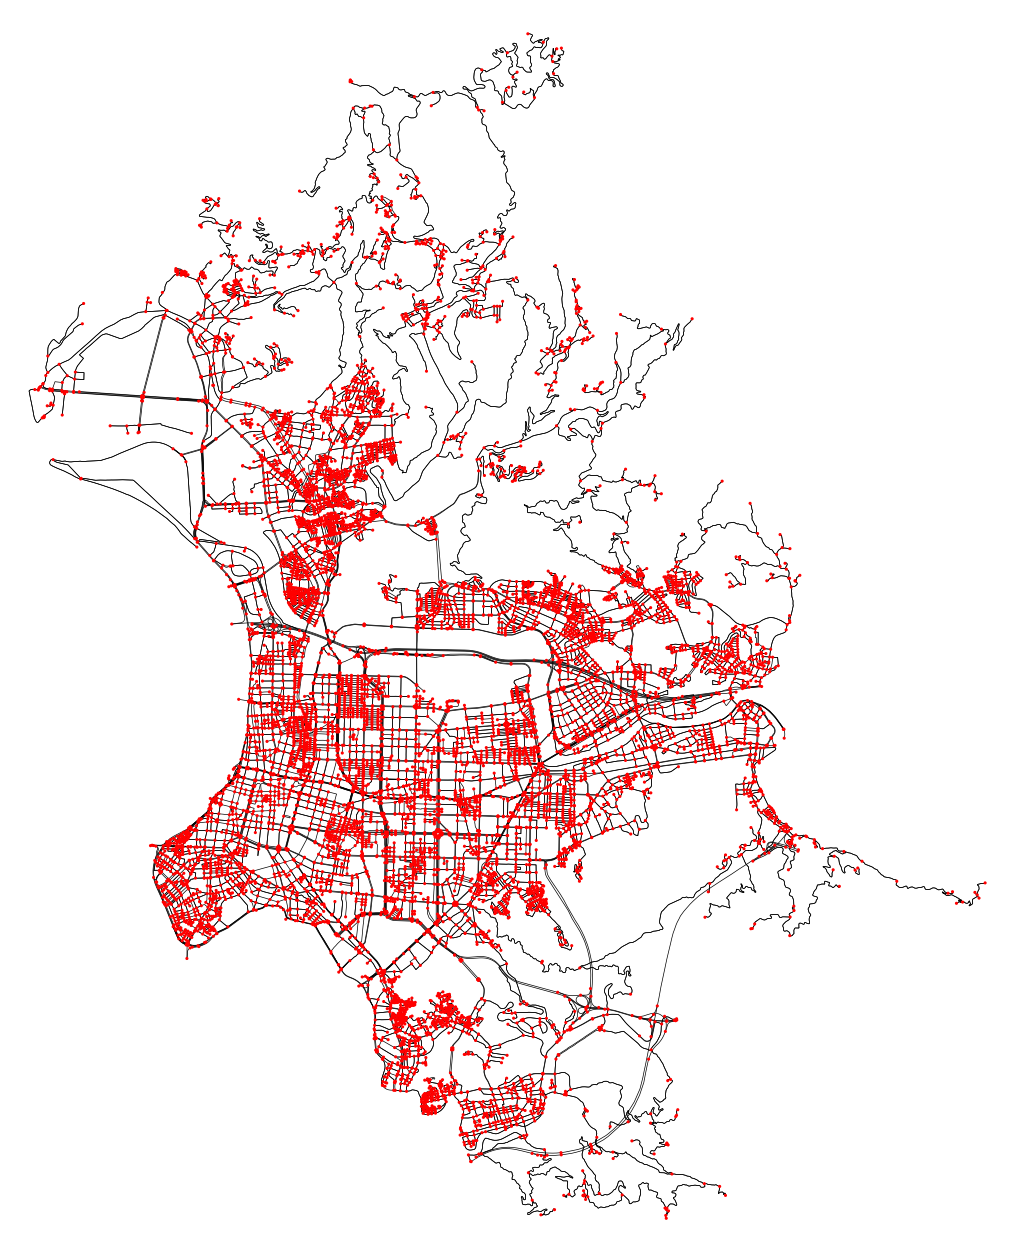

In [13]:
# ~30 sec?
# https://osmnx.readthedocs.io/en/stable/user-reference.html#osmnx.plot.plot_graph
fig, ax = ox.plot_graph(
    G,
    figsize=(16, 16),
    bgcolor="#fff", edge_color="#000", node_color="#f00",
    node_size=5, edge_linewidth=0.5
)

In [5]:
# ~5 sec
with open(f"./data/{CITY_SLUG}_networkx_graph.pkl", "wb") as fout:
    pickle.dump(G, fout)

In [6]:
# ~15 sec
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
gdf_nodes.head()

,y,x,street_count,highway,ref,geometry
osmid,,,,,,
4574642202,25.033451,121.565783,3,NaN,NaN,POINT (121.56578 25.03345)
4574642204,25.033477,121.566217,3,NaN,NaN,POINT (121.56622 25.03348)
9701982238,25.038144,121.557744,3,NaN,NaN,POINT (121.55774 25.03814)
6725632045,25.025885,121.554124,3,NaN,NaN,POINT (121.55412 25.02589)
6725632046,25.025785,121.554237,3,NaN,NaN,POINT (121.55424 25.02578)


In [7]:
gdf_nodes.to_csv(f"./data/{CITY_SLUG}_network_nodes.csv")
gdf_edges.to_csv(f"./data/{CITY_SLUG}_network_edges.csv")